### Import Libraries

In [1]:
#Data quality libraries
import numpy as np
import os
import random
import json
import datetime
import time
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.rc('font', size=16)
from sklearn.linear_model import LinearRegression

Matplotlib is building the font cache; this may take a moment.


In [2]:
#Create curves representations
def create_curve(x_values_v, y_values_v):
  model = LinearRegression()
  x_values = np.array(x_values_v).reshape(-1, 1)
  model.fit(np.log(x_values), y_values_v)
  C1 = model.intercept_
  C2 = model.coef_[0]
  curve = C1 + C2 * np.log(x_values_v)

  return curve

### StartLightsCurves Graphical Results

#### Performance Curves Comparison on Horizontal and Vertical Data Volume reduction

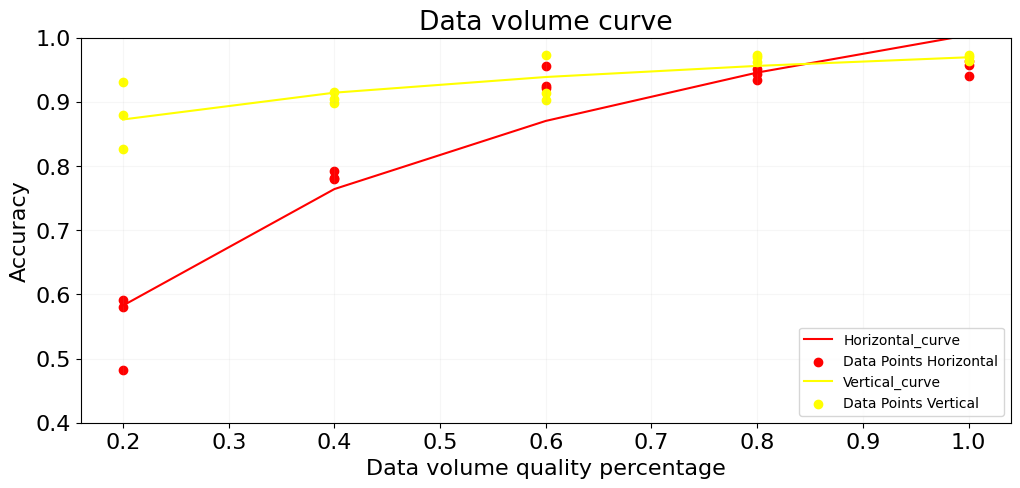

In [8]:
file_path_h = './Datasets/Datasets_Training/StarLightsCurves/results/Data Volume/results_horizontal.json'
with open(file_path_h, "r") as json_file:
    data_h = json.load(json_file)

file_path_v = './Datasets/Datasets_Training/StarLightsCurves/results/Data Volume/results_vertical.json'
with open(file_path_v, "r") as json_file:
    data_v = json.load(json_file)

x_values_h = []
y_values_h = []
for object_experiment in data_h:
  y_values_h.append(object_experiment["Accuracy_6"])
  x_values_h.append(object_experiment["data_volume"])

x_values_v = []
y_values_v = []
for object_experiment in data_v:
  y_values_v.append(object_experiment["Accuracy_6"])
  x_values_v.append((0.1*object_experiment["num_clients"]))

plt.figure(figsize=(12,5))
plt.plot(x_values_h, create_curve(x_values_h, y_values_h), color='red', label='Horizontal_curve')
plt.scatter(x_values_h, y_values_h, color='red', label='Data Points Horizontal')
plt.plot(x_values_v, create_curve(x_values_v, y_values_v), color='yellow', label='Vertical_curve')
plt.scatter(x_values_v, y_values_v, color='yellow', label='Data Points Vertical')
plt.title("Data volume curve")
plt.xlabel("Data volume quality percentage")
plt.ylabel("Accuracy")
plt.grid(alpha=0.1)
plt.ylim([0.4, 1.0])
plt.legend(fontsize=10)
plt.show()

#### Energy Consumption Curves Comparison on Horizontal and Vertical Data Volume reduction

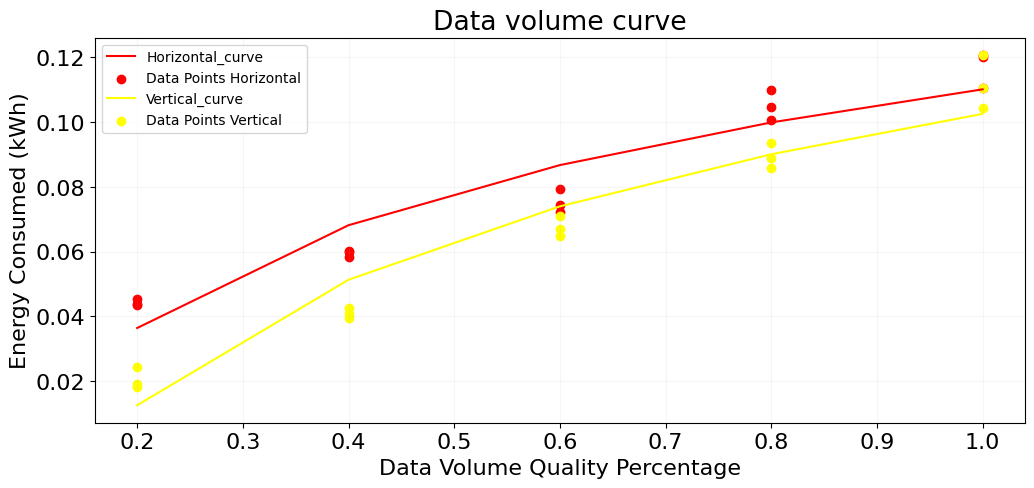

In [9]:
#Curves Comparison Data Volume Horizontally and Vertical performance
file_path_h = './Datasets/Datasets_Training/StarLightsCurves/results/Data Volume/results_horizontal.json'
with open(file_path_h, "r") as json_file:
    data_h = json.load(json_file)

file_path_v = './Datasets/Datasets_Training/StarLightsCurves/results/Data Volume/results_vertical.json'
with open(file_path_v, "r") as json_file:
    data_v = json.load(json_file)

x_values_h = []
y_values_h = []
for object_experiment in data_h:
  y_values_h.append(object_experiment["effective_energy_consumed"])
  x_values_h.append(object_experiment["data_volume"])

x_values_v = []
y_values_v = []
for object_experiment in data_v:
  y_values_v.append(object_experiment["effective_energy_consumed"])
  x_values_v.append((0.1*object_experiment["num_clients"]))


plt.figure(figsize=(12,5))
plt.plot(x_values_h, create_curve(x_values_h, y_values_h), color='red', label='Horizontal_curve')
plt.scatter(x_values_h, y_values_h, color='red', label='Data Points Horizontal')
plt.plot(x_values_v, create_curve(x_values_v, y_values_v), color='yellow', label='Vertical_curve')
plt.scatter(x_values_v, y_values_v, color='yellow', label='Data Points Vertical')
plt.title("Data volume curve")
plt.xlabel("Data Volume Quality Percentage")
plt.ylabel("Energy Consumed (kWh)")
plt.grid(alpha=0.1)
plt.legend(fontsize=10)
plt.show()

#### Performance Curves Comparison on Horizontal and Vertical Consistency reduction

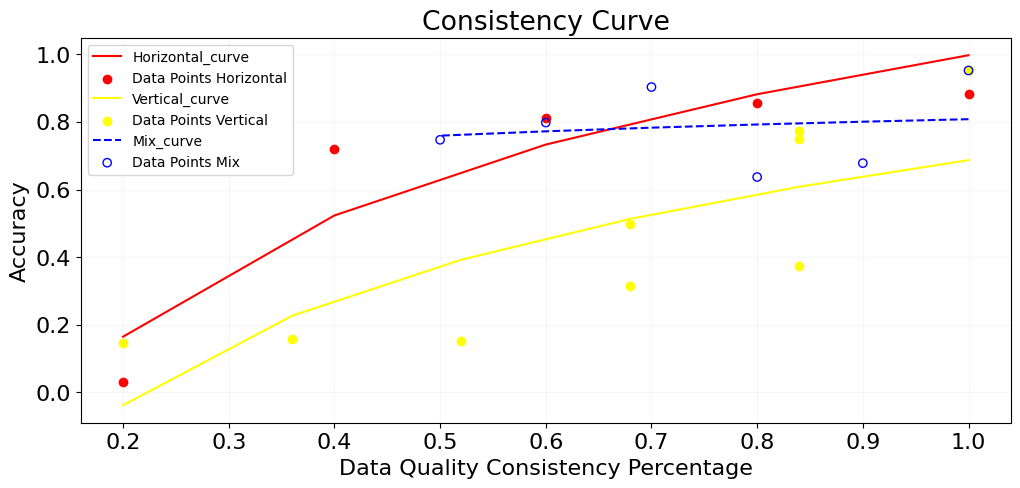

In [10]:
#Curves Comparison Consistency Horizontally and Vertical performance
file_path_h = './Datasets/Datasets_Training/StarLightsCurves/results/Consistency/horizontal_consistency.json'
with open(file_path_h, "r") as json_file:
    data_h = json.load(json_file)

file_path_v = './Datasets/Datasets_Training/StarLightsCurves/results/Consistency/vertical_consistency.json'
with open(file_path_v, "r") as json_file:
    data_v = json.load(json_file)

file_path_m = './Datasets/Datasets_Training/StarLightsCurves/results/Consistency/mix_consistency.json' #Both Horizontal and Vertical Reduction applied at the same time
with open(file_path_m, "r") as json_file:
    data_m = json.load(json_file)

x_values_h = []
y_values_h = []
for object_experiment in data_h:
  y_values_h.append(object_experiment["Accuracy_6"])
  x_values_h.append(object_experiment["consistency"])

x_values_v = []
y_values_v = []
for object_experiment in data_v:
  y_values_v.append(object_experiment["Accuracy_6"])
  x_values_v.append(object_experiment["consistency"])

x_values_m = []
y_values_m = []
for object_experiment in data_m:
  y_values_m.append(object_experiment["Accuracy_6"])
  x_values_m.append(object_experiment["consistency"])

plt.figure(figsize=(12,5))
plt.plot(x_values_h, create_curve(x_values_h, y_values_h), color='red', label='Horizontal_curve')
plt.scatter(x_values_h, y_values_h,  color='red', label='Data Points Horizontal')
plt.plot(x_values_v, create_curve(x_values_v, y_values_v), color='yellow', label='Vertical_curve')
plt.scatter(x_values_v, y_values_v, color='yellow', label='Data Points Vertical')
plt.plot(x_values_m, create_curve(x_values_m, y_values_m), linestyle='--', color='blue', label='Mix_curve') 
plt.scatter(x_values_m, y_values_m, marker='o', facecolors = 'none', edgecolors = 'blue', label='Data Points Mix')
plt.title("Consistency Curve")
plt.xlabel("Data Quality Consistency Percentage")
plt.ylabel("Accuracy")
plt.grid(alpha=0.1)
plt.legend(fontsize=10)
plt.show()

#### Energy Consumption Curves Comparison on Horizontal and Vertical Consistency reduction

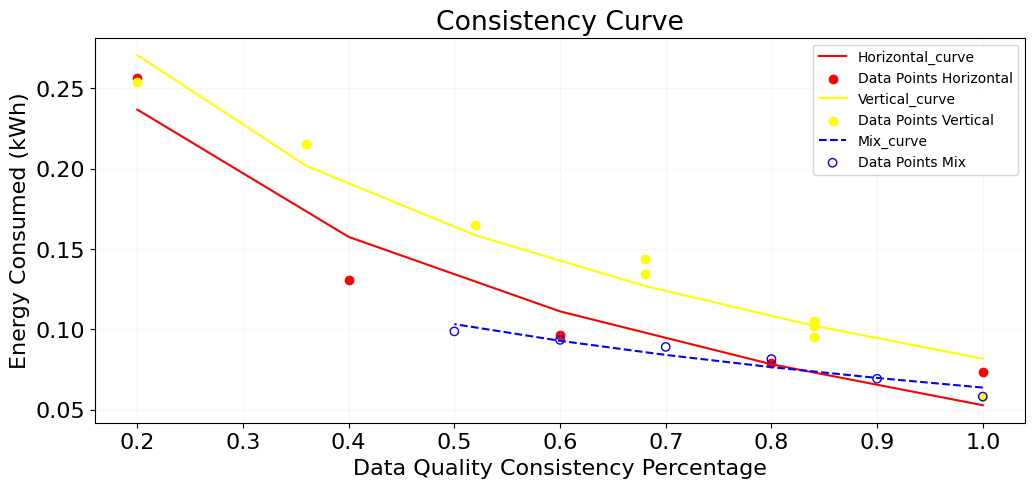

In [11]:
#Curves Comparison Consistency Horizontally and Vertical energy consumed
file_path_h = './Datasets/Datasets_Training/StarLightsCurves/results/Consistency/horizontal_consistency.json'
with open(file_path_h, "r") as json_file:
    data_h = json.load(json_file)

file_path_v = './Datasets/Datasets_Training/StarLightsCurves/results/Consistency/vertical_consistency.json'
with open(file_path_v, "r") as json_file:
    data_v = json.load(json_file)

file_path_m = './Datasets/Datasets_Training/StarLightsCurves/results/Consistency/mix_consistency.json' #Both Horizontal and Vertical Reduction applied at the same time
with open(file_path_m, "r") as json_file:
    data_m = json.load(json_file)

x_values_h = []
y_values_h = []
for object_experiment in data_h:
  y_values_h.append(object_experiment["effective_energy_consumed"])
  x_values_h.append(object_experiment["consistency"])

x_values_v = []
y_values_v = []
for object_experiment in data_v:
  y_values_v.append(object_experiment["effective_energy_consumed"])
  x_values_v.append(object_experiment["consistency"])

x_values_m = []
y_values_m = []
for object_experiment in data_m:
  y_values_m.append(object_experiment["effective_energy_consumed"])
  x_values_m.append(object_experiment["consistency"])

plt.figure(figsize=(12,5))
plt.plot(x_values_h, create_curve(x_values_h, y_values_h), color='red', label='Horizontal_curve')
plt.scatter(x_values_h, y_values_h, color='red', label='Data Points Horizontal')
plt.plot(x_values_v, create_curve(x_values_v, y_values_v), color='yellow', label='Vertical_curve')
plt.scatter(x_values_v, y_values_v, color='yellow', label='Data Points Vertical')
plt.plot(x_values_m, create_curve(x_values_m, y_values_m), linestyle='--', color='blue', label='Mix_curve')
plt.scatter(x_values_m, y_values_m, marker='o', facecolors = 'none', edgecolors = 'blue', label='Data Points Mix')
plt.title("Consistency Curve")
plt.xlabel("Data Quality Consistency Percentage")
plt.ylabel("Energy Consumed (kWh)")
plt.grid(alpha=0.1)
plt.legend(fontsize=10)
plt.show()

#### Performance Curves Comparison on Horizontal and Vertical Accuracy reduction

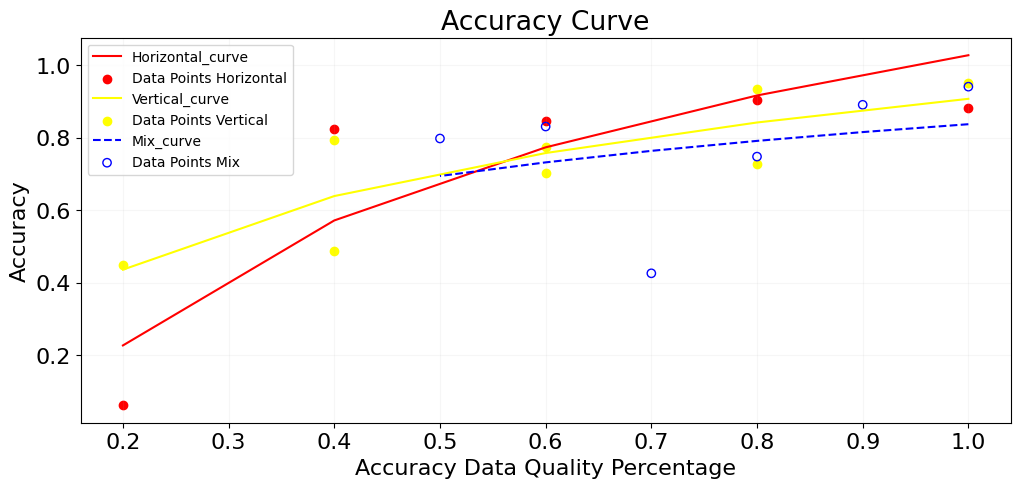

In [12]:
#Curves Comparison Accuracy Horizontally and Vertical performance
file_path_h = './Datasets/Datasets_Training/StarLightsCurves/results/Accuracy/horizontal_accuracy.json'
with open(file_path_h, "r") as json_file:
    data_h = json.load(json_file)

file_path_v = './Datasets/Datasets_Training/StarLightsCurves/results/Accuracy/vertical_accuracy.json'
with open(file_path_v, "r") as json_file:
    data_v = json.load(json_file)

file_path_m = './Datasets/Datasets_Training/StarLightsCurves/results/Accuracy/mix_accuracy.json' #Both Horizontal and Vertical Reduction applied at the same time
with open(file_path_m, "r") as json_file:
    data_m = json.load(json_file)

x_values_h = []
y_values_h = []
for object_experiment in data_h:
  y_values_h.append(object_experiment["Accuracy_6"])
  x_values_h.append(object_experiment["accuracy"])

x_values_v = []
y_values_v = []
for object_experiment in data_v:
  y_values_v.append(object_experiment["Accuracy_6"])
  x_values_v.append(object_experiment["accuracy"])

x_values_m = []
y_values_m = []
for object_experiment in data_m:
  y_values_m.append(object_experiment["Accuracy_6"])
  x_values_m.append(object_experiment["accuracy"])

plt.figure(figsize=(12,5))
plt.plot(x_values_h, create_curve(x_values_h, y_values_h), color='red', label='Horizontal_curve')
plt.scatter(x_values_h, y_values_h, color='red', label='Data Points Horizontal')
plt.plot(x_values_v, create_curve(x_values_v, y_values_v), color='yellow', label='Vertical_curve')
plt.scatter(x_values_v, y_values_v, color='yellow', label='Data Points Vertical')
plt.plot(x_values_m, create_curve(x_values_m, y_values_m), linestyle='--', color='blue', label='Mix_curve')
plt.scatter(x_values_m, y_values_m, marker='o', facecolors = 'none', edgecolors = 'blue', label='Data Points Mix')
plt.title("Accuracy Curve")
plt.xlabel("Accuracy Data Quality Percentage")
plt.ylabel("Accuracy")
plt.grid(alpha=0.1)
plt.legend(fontsize=10)
plt.show()

#### Energy Consumption Curves Comparison on Horizontal and Vertical Accuracy reduction

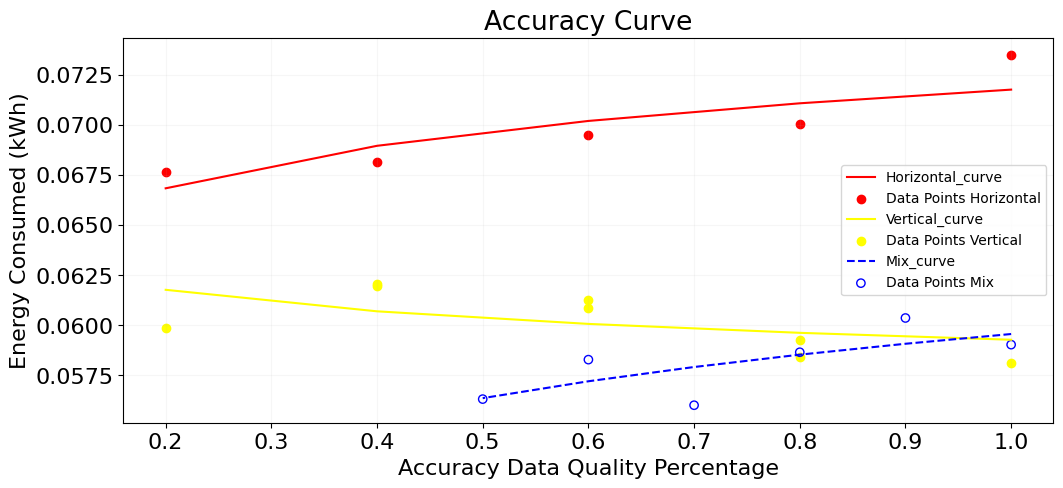

In [13]:
#Curves Comparison Accuracy Horizontally and Vertical energy consumed
file_path_h = './Datasets/Datasets_Training/StarLightsCurves/results/Accuracy/horizontal_accuracy.json'
with open(file_path_h, "r") as json_file:
    data_h = json.load(json_file)

file_path_v = './Datasets/Datasets_Training/StarLightsCurves/results/Accuracy/vertical_accuracy.json'
with open(file_path_v, "r") as json_file:
    data_v = json.load(json_file)

file_path_m = './Datasets/Datasets_Training/StarLightsCurves/results/Accuracy/mix_accuracy.json' #Both Horizontal and Vertical Reduction applied at the same time
with open(file_path_m, "r") as json_file:
    data_m = json.load(json_file)

x_values_h = []
y_values_h = []
for object_experiment in data_h:
  y_values_h.append(object_experiment["effective_energy_consumed"])
  x_values_h.append(object_experiment["accuracy"])

x_values_v = []
y_values_v = []
for object_experiment in data_v:
  y_values_v.append(object_experiment["effective_energy_consumed"])
  x_values_v.append(object_experiment["accuracy"])

x_values_m = []
y_values_m = []
for object_experiment in data_m:
  y_values_m.append(object_experiment["effective_energy_consumed"])
  x_values_m.append(object_experiment["accuracy"])

plt.figure(figsize=(12,5))
plt.plot(x_values_h, create_curve(x_values_h, y_values_h), color='red', label='Horizontal_curve')
plt.scatter(x_values_h, y_values_h, color='red', label='Data Points Horizontal')
plt.plot(x_values_v, create_curve(x_values_v, y_values_v), color='yellow', label='Vertical_curve')
plt.scatter(x_values_v, y_values_v, color='yellow', label='Data Points Vertical')
plt.plot(x_values_m, create_curve(x_values_m, y_values_m), linestyle='--', color='blue', label='Mix_curve')
plt.scatter(x_values_m, y_values_m, marker='o', facecolors = 'none', edgecolors = 'blue', label='Data Points Mix')
plt.title("Accuracy Curve")
plt.xlabel("Accuracy Data Quality Percentage")
plt.ylabel("Energy Consumed (kWh)")
plt.grid(alpha=0.1)
plt.legend(fontsize=10)
plt.show()

#### Performance Curves Comparison on Horizontal and Vertical Completeness reduction

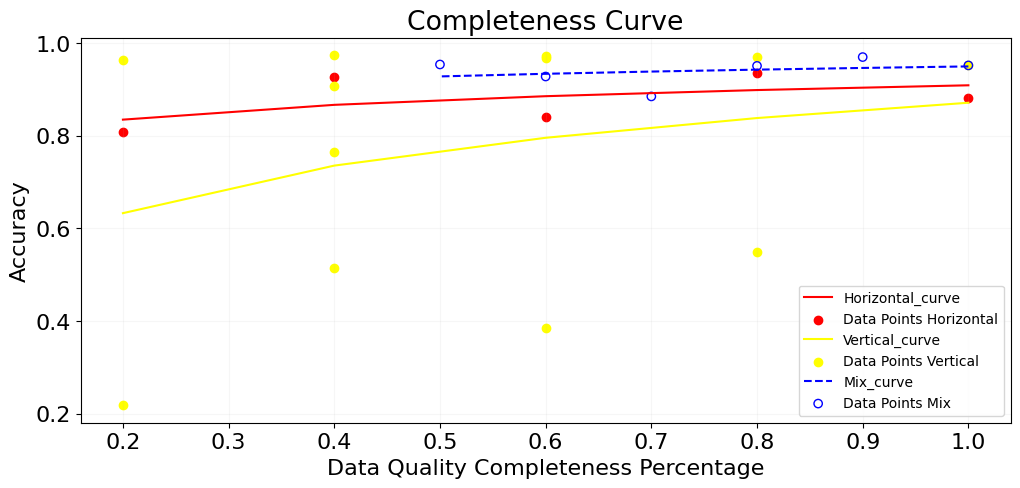

In [14]:
#Curves Comparison Completeness Horizontally and Vertical performance
file_path_h = './Datasets/Datasets_Training/StarLightsCurves/results/Completeness/horizontal_completeness.json'
with open(file_path_h, "r") as json_file:
    data_h = json.load(json_file)

file_path_v = './Datasets/Datasets_Training/StarLightsCurves/results/Completeness/vertical_completeness.json'
with open(file_path_v, "r") as json_file:
    data_v = json.load(json_file)

file_path_m = './Datasets/Datasets_Training/StarLightsCurves/results/Completeness/mix_completeness.json' #Both Horizontal and Vertical Reduction applied at the same time
with open(file_path_m, "r") as json_file:
    data_m = json.load(json_file)

x_values_h = []
y_values_h = []
for object_experiment in data_h:
  y_values_h.append(object_experiment["Accuracy_6"])
  x_values_h.append(object_experiment["completeness"])

x_values_v = []
y_values_v = []
for object_experiment in data_v:
  y_values_v.append(object_experiment["Accuracy_6"])
  x_values_v.append(object_experiment["completeness"])

x_values_m = []
y_values_m = []
for object_experiment in data_m:
  y_values_m.append(object_experiment["Accuracy_6"])
  x_values_m.append(object_experiment["completeness"])


plt.figure(figsize=(12,5))
plt.plot(x_values_h, create_curve(x_values_h, y_values_h), color='red', label='Horizontal_curve')
plt.scatter(x_values_h, y_values_h, color="red", label='Data Points Horizontal')
plt.plot(x_values_v, create_curve(x_values_v, y_values_v), color='yellow', label='Vertical_curve')
plt.scatter(x_values_v, y_values_v, color="yellow", label='Data Points Vertical')
plt.plot(x_values_m, create_curve(x_values_m, y_values_m), linestyle='--', color='blue', label='Mix_curve')
plt.scatter(x_values_m, y_values_m, marker='o', facecolors = 'none', edgecolors = 'blue', label='Data Points Mix')
plt.title("Completeness Curve")
plt.xlabel("Data Quality Completeness Percentage")
plt.ylabel("Accuracy")
plt.grid(alpha=0.1)
plt.legend(fontsize=10)
plt.show()

#### Energy Consumption Curves Comparison on Horizontal and Vertical Completeness reduction

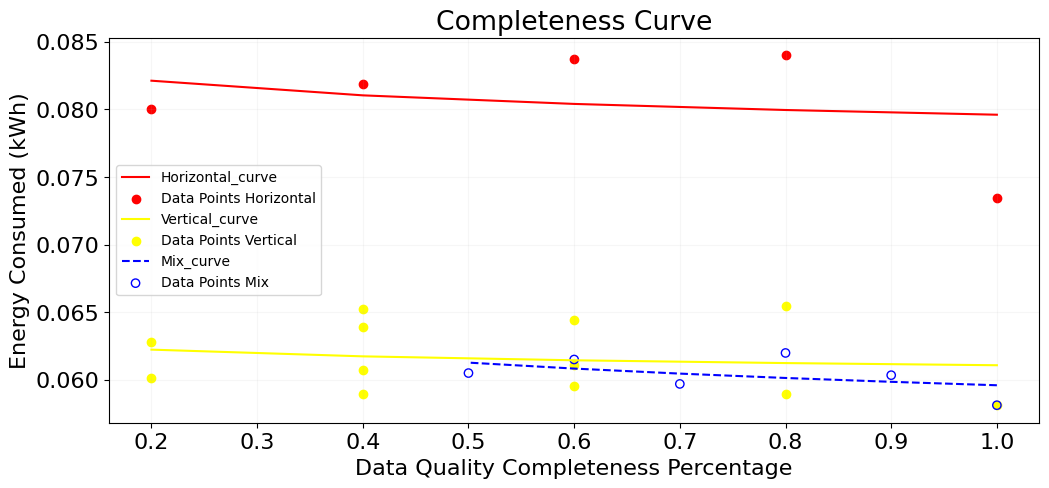

In [15]:
#Curves Comparison Completeness Horizontally and Vertical energy consumption
file_path_h = './Datasets/Datasets_Training/StarLightsCurves/results/Completeness/horizontal_completeness.json'
with open(file_path_h, "r") as json_file:
    data_h = json.load(json_file)

file_path_v = './Datasets/Datasets_Training/StarLightsCurves/results/Completeness/vertical_completeness.json'
with open(file_path_v, "r") as json_file:
    data_v = json.load(json_file)

file_path_m = './Datasets/Datasets_Training/StarLightsCurves/results/Completeness/mix_completeness.json' #Both Horizontal and Vertical Reduction applied at the same time
with open(file_path_m, "r") as json_file:
    data_m = json.load(json_file)

x_values_h = []
y_values_h = []
for object_experiment in data_h:
  y_values_h.append(object_experiment["effective_energy_consumed"])
  x_values_h.append(object_experiment["completeness"])

x_values_v = []
y_values_v = []
for object_experiment in data_v:
  y_values_v.append(object_experiment["effective_energy_consumed"])
  x_values_v.append(object_experiment["completeness"])

x_values_m = []
y_values_m = []
for object_experiment in data_m:
  y_values_m.append(object_experiment["effective_energy_consumed"])
  x_values_m.append(object_experiment["completeness"])

plt.figure(figsize=(12,5))
plt.plot(x_values_h, create_curve(x_values_h, y_values_h), color='red', label='Horizontal_curve')
plt.scatter(x_values_h, y_values_h, color='red', label='Data Points Horizontal')
plt.plot(x_values_v, create_curve(x_values_v, y_values_v), color='yellow', label='Vertical_curve')
plt.scatter(x_values_v, y_values_v, color='yellow', label='Data Points Vertical')
plt.plot(x_values_m, create_curve(x_values_m, y_values_m), linestyle='--', color='blue', label='Mix_curve')
plt.scatter(x_values_m, y_values_m, marker='o', facecolors = 'none', edgecolors = 'blue', label='Data Points Mix')
plt.title("Completeness Curve")
plt.xlabel("Data Quality Completeness Percentage")
plt.ylabel("Energy Consumed (kWh)")
plt.grid(alpha=0.1)
plt.legend(fontsize=10)
plt.show()